## Cleaning and Combining DimensionsAI and OpenAlex Data


In [65]:
import csv
import pandas as pd

def find_csv(file_path):
    with open(file_path, 'r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        df = pd.DataFrame(reader)
    return df
#openAlexPub = find_csv("C:/Users/ashle/OneDrive/School/Capstone/names/openAlex_data.csv")
#dimensGrant = find_csv("C:/Users/ashle/OneDrive/School/Capstone/dimensionsAI/dimensionsGrants_data.csv")



In [67]:
# put csv's in dataframes and identify which names are of which induction year
def add_ASCIyear(df, writeTo_path):
    file_path = "C:/Users/ashle/OneDrive/School/Capstone/names/1995_2010_details.csv"

    with open(file_path, 'r', newline='', encoding='utf-8') as csvfile:
        indv_details = csv.DictReader(csvfile)
        full_names_year_dict = {}

        for row in indv_details:
            full_names_year_dict[row['full_name']] = row['year']

    person_column = df['Person']
    all_years = [] 
    for person in person_column:
        if person in list(full_names_year_dict.keys()):
            all_years.append(full_names_year_dict[person])
        else:
            print(f'{person} needs their name fixed in details')

    if len(all_years) == len(df):
        df['asci_year'] = all_years
    else:
        print("The length of the asci_year_list does not match the number of rows in the DataFrame.")
        
    df.to_csv(writeTo_path, index=False, encoding='utf-8')

#add_ASCIyear(dimensGrant, "C:/Users/ashle/OneDrive/School/Capstone/dimensionsAI/dimensionsGrants_data.csv")

In [58]:
#grouping physician-scientists by genetics vs not genetics field using key words = 'Gene Transfer/Gene Therapy' and "Genetics"
file_details="C:/Users/ashle/OneDrive/School/Capstone/names/1995_2010_details.csv"
genetics = []
non_genetics = []
internal_med = []
immunology = []
pediatrics = []
with open(file_details, 'r', newline='', encoding='utf-8') as csvfile:
    indv_details = csv.DictReader(csvfile)
    for row in indv_details:
        if "Genetics" in row["original specialization"] or "Gene Transfer/Gene Therapy" in row["original specialization"] or "Genomics" in row["original specialization"]:
            genetics.append(row["full_name"])
        elif "Internal Medicine" in row["original specialization"]:
            internal_med.append(row["full_name"])
        elif "Immunology" in row["original specialization"]:
            immunology.append(row["full_name"])
        elif "Pediatrics" in row["original specialization"]:
            pediatrics.append(row["full_name"])
        else:
            non_genetics.append(row["full_name"])
            print(row["original specialization"])

print(f'Number of People with Genetics Specialty: {len(genetics)}')
print(f'Number of People with Internal Medicicine Specialty: {len(internal_med)}')
print(f'Number of People with Pediatrics Specialty: {len(pediatrics)}')
print(f'Number of People with Immunology Specialty: {len(immunology)}')

print(len(non_genetics))


['Gastroenterology']
['Physiology', 'Nephrology', 'History of Medicine', 'Metabolism', 'Hypertension', 'Cell Biology', 'Biochemistry']
['Neurology']
['Dermatology']
[]
['Diabetes', 'Cell Biology', 'Molecular Biology', 'Endocrinology']
['Gastroenterology', 'Infectious Disease']
[]
['Hematology']
['Gastroenterology', 'Cancer biology', 'Molecular Biology']
[]
['Biomedical Engineering', 'Cardiology', 'Physiology', 'Hypertension', 'Cardiovascular Disease']
['Molecular Biology', 'Endocrinology']
[]
['Molecular Biology', 'Gastroenterology', 'Hepatology', 'Cell Biology']
[]
['Neurology']
[]
[]
[]
[]
['Endocrinology', 'Diabetes', 'Metabolism', 'Biochemistry', 'Cell Biology']
[]
[]
[]
[]
['Infectious Disease']
['Critical Care Medicine', 'Pulmonology', 'Cardiovascular Disease', 'Administration', 'Physiology']
[]
['Hypertension', 'Biophysics', 'Nephrology', 'Physiology']
[]
[]
[]
[]
['Toxicology', 'Biophysics', 'Neurobiology', 'Hypertension', 'Pharmacology', 'Molecular Biology']
['Medicine', 'Infe

In [59]:
# take the induction year and filter data only ten years from then
# if name in row is induction year then write that row in another csv if it was submitted in time interval below
# ie. 1995-2005 and 2010-2020
dimensPatent = find_csv("C:/Users/ashle/OneDrive/School/Capstone/dimensionsAI/dimensionsPatent_data.csv")
dimensCT = find_csv("C:/Users/ashle/OneDrive/School/Capstone/dimensionsAI/dimensionsCT_data.csv")
dimensGrant = find_csv("C:/Users/ashle/OneDrive/School/Capstone/dimensionsAI/dimensionsGrants_data.csv")
openAlexPub = find_csv("C:/Users/ashle/OneDrive/School/Capstone/names/openAlex_data.csv")

#referenced_works, pubs

In [ ]:
#checking column problems
print(openAlexPub['Person'].unique())

In [68]:
# isolates variable row year as a column
def add_years(df, columnName):
    df[columnName] = pd.to_datetime(df[columnName], errors='coerce')
    missing_values_count = df[columnName].isna().sum()
    print(f"Number of missing values in '{columnName}': {missing_values_count}")
    df['year'] = df[columnName].dt.year.astype('Int64')
    df = df.dropna(subset=['year'])
    df['year'] = df['year'].astype(int)
    return df
add_years(dimensCT, 'date')
#print(dimensCT['year'])

add_years(dimensGrant, 'start_date')
#print(dimensGrant['year'])


Number of missing values in 'date': 4
Number of missing values in 'start_date': 1


C:\Users\ashle\AppData\Local\Temp\ipykernel_8152\1902450039.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)
C:\Users\ashle\AppData\Local\Temp\ipykernel_8152\1902450039.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)


,Person,abstract,active_years,altmetric,associated_grant_ids,brief_title,category_bra,category_for,category_for_2020,category_hra,...,study_designs,study_eligibility_criteria,study_maximum_age,study_minimum_age,study_outcome_measures,study_participants,study_type,title,asci_year,year
0,alan d'andrea,Project Summary (Overall) The Overall section ...,,,,,"[{'id': '4001', 'name': 'Clinical Medicine and...","[{'id': '80003', 'name': '32 Biomedical and Cl...","[{'id': '80003', 'name': '32 Biomedical and Cl...","[{'id': '3900', 'name': 'Biomedical'}]",...,,,,,,,,Dana Farber/Harvard Cancer Center Ovarian Canc...,1995,2020
1,alan d'andrea,Dr D’Andrea’s laboratory has a long standing h...,,,,,"[{'id': '4000', 'name': 'Basic Science'}]","[{'id': '80003', 'name': '32 Biomedical and Cl...","[{'id': '80003', 'name': '32 Biomedical and Cl...","[{'id': '3900', 'name': 'Biomedical'}]",...,,,,,,,,EZH2 determines PARPi resistance and fork stab...,1995,2017
2,alan d'andrea,Resistance to targeted therapies is a major cl...,,,,,"[{'id': '4000', 'name': 'Basic Science'}]","[{'id': '80003', 'name': '32 Biomedical and Cl...","[{'id': '80003', 'name': '32 Biomedical and Cl...","[{'id': '3900', 'name': 'Biomedical'}]",...,,,,,,,,Overcoming PARP inhibitor resistance in ovaria...,1995,2017
3,alan d'andrea,PUBLIC ABSTRACT\n\nBreast cancer accounts for ...,,,,,"[{'id': '4000', 'name': 'Basic Science'}]","[{'id': '80003', 'name': '32 Biomedical and Cl...","[{'id': '80003', 'name': '32 Biomedical and Cl...","[{'id': '3900', 'name': 'Biomedical'}]",...,,,,,,,,Dissecting the Mechanisms of Drug Resistance i...,1995,2016
4,alan d'andrea,Combined modality therapy (CMT) involving conc...,,,,,"[{'id': '4001', 'name': 'Clinical Medicine and...","[{'id': '80003', 'name': '32 Biomedical and Cl...","[{'id': '80003', 'name': '32 Biomedical and Cl...","[{'id': '3900', 'name': 'Biomedical'}]",...,,,,,,,,Identifying Genomic Determinants of Chemoradio...,1995,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,alan yu,,,,,,,,,,...,,,,,,,,Sodium-chloride co-transporter regulation in t...,2010,2010
2434,alan yu,PROJECT SUMMARY Kidney function is critical to...,,,,,"[{'id': '4000', 'name': 'Basic Science'}]","[{'id': '80003', 'name': '32 Biomedical and Cl...","[{'id': '80003', 'name': '32 Biomedical and Cl...","[{'id': '3900', 'name': 'Biomedical'}]",...,,,,,,,,Renal electrolyte handling in females vs. male...,2010,2009
2435,alan yu,DESCRIPTION (provided by applicant): This prog...,,,,,"[{'id': '4001', 'name': 'Clinical Medicine and...","[{'id': '80003', 'name': '32 Biomedical and Cl...","[{'id': '80003', 'name': '32 Biomedical and Cl...","[{'id': '3900', 'name': 'Biomedical'}]",...,,,,,,,,University of Kansas Training Grant in Nephrology,2010,2006
2436,alan yu,DESCRIPTION (provided by applicant): Claudins ...,,,,,,"[{'id': '80003', 'name': '32 Biomedical and Cl...","[{'id': '80003', 'name': '32 Biomedical and Cl...",,...,,,,,,,,"Expression, function and regulation of renal c...",2010,2002


In [61]:
#use the data frame and take the asci_year and make an interval and delete works not in that interval with that asci-year

#publication = "publication_year" ; openAlexPub
#patent = "year" ; dimensPatent
#ct = "year" ; dimensCT
#grant = "year" ; dimensGrant
#list_df = [dimensPatent, dimensCT, dimensGrant, openAlexPub]

def filter_dfDimens(df):
    dfs = {}
    for year, group in df.groupby('asci_year'):
        dfs[year] = group

    df_2010 = dfs['2010']
    df_1995 = dfs['1995']
    


    # print(len(df_2010))
    # print(len(df_1995))
    #print(df_2010['asci_year'])
    #print(df_1995['asci_year'])


    df_1995['year'] = pd.to_numeric(df_1995['year'], errors='coerce')
    filtered_df_1995 = df_1995[(df_1995['year'] >= 1995) & (df_1995['year'] <= 2005)]

    df_2010['year'] = pd.to_numeric(df_2010['year'], errors='coerce')
    filtered_df_2010 = df_2010[(df_2010['year'] >= 2010) & (df_2010['year'] <= 2020)]


    concatenated_df = pd.concat([filtered_df_1995, filtered_df_2010], ignore_index=True)
    print(f'Length of dataframe: {len(concatenated_df)}')
    
    return concatenated_df

#filter_dfDimens(dimensPatent) 
#30% of CT's are between each date out of whole dataset
#20% of Patents
#36% of Grants

def filter_dfOpenAlex(df):
    dfs = {}
    for year, group in df.groupby('asci_year'):
        dfs[year] = group

    df_2010 = dfs['2010']
    df_1995 = dfs['1995']
    


    # print(len(df_2010))
    # print(len(df_1995))
    #print(df_2010['asci_year'])
    #print(df_1995['asci_year'])


    df_1995['publication_year'] = pd.to_numeric(df_1995['publication_year'], errors='coerce')
    filtered_df_1995 = df_1995[(df_1995['publication_year'] >= 1996) & (df_1995['publication_year'] <= 2005)]
    
    df_2010['publication_year'] = pd.to_numeric(df_2010['publication_year'], errors='coerce')
    filtered_df_2010 = df_2010[(df_2010['publication_year'] >= 2011) & (df_2010['publication_year'] <= 2020)]


    concatenated_df = pd.concat([filtered_df_1995, filtered_df_2010], ignore_index=True)
    print(f'Length of dataframe: {len(concatenated_df)}')
    
    return concatenated_df

#filter_dfOpenAlex(openAlexPub)
#28% of CT's are between each date out of whole dataset

In [19]:
#filters data for time interval
# list_df = [dimensPatent, dimensCT, dimensGrant, openAlexPub]
# date_Grant = filter_dfDimens(dimensGrant)
# date_Patent = filter_dfDimens(dimensPatent)
# date_CT = filter_dfDimens(dimensCT)
# date_Pub = filter_dfOpenAlex(openAlexPub)

# least_common_name = date_Pub['Person'].value_counts().idxmin()
# print(f"The least common name is: {least_common_name}")

# duplicates = openAlexPub[openAlexPub["title"].duplicated(keep=False)]
# print("Duplicate rows based on 'title' column:")
# duplicates

Length of dataframe: 899
Length of dataframe: 3008
Length of dataframe: 88
Length of dataframe: 21812
The least common name is: christine cartwright


In [69]:
# Clean data- duplications
list_df = [dimensPatent, dimensCT, dimensGrant, openAlexPub]

def fix_encoding_and_lower(df):
    df['title'] = df['title'].apply(lambda x: x.lower())
    return df

# Apply the function to the 'title' column
   

filter_patent = fix_encoding_and_lower(dimensPatent)
filer_ct = fix_encoding_and_lower(dimensCT)
filter_grant = fix_encoding_and_lower(dimensGrant)
filter_pubs = fix_encoding_and_lower(openAlexPub)


In [70]:
grant_csv = 'final_Grant.csv'
patent_csv = 'final_Patent.csv'
ct_csv = 'final_CT.csv'
pubs_csv = 'final_Pub.csv'

filter_pubs = filter_pubs.drop_duplicates(subset='title', keep='first')
filter_grant = filter_grant.drop_duplicates(subset='title', keep='first')
filter_patent = filter_patent.drop_duplicates(subset='application_number', keep='first')
filer_ct = filer_ct.drop_duplicates(subset='id', keep='first')

filter_grant.to_csv(grant_csv, index=False)
filter_patent.to_csv(patent_csv, index=False)
filer_ct.to_csv(ct_csv, index=False)
filter_pubs.to_csv(pubs_csv, index=False)


## Start Basic Visualizations


In [ ]:
import matplotlib.pyplot as plt

total_rows_patents = len(dimensPatent)
total_rows_cts = len(dimensCT)
total_rows_grants = len(dimensGrant)
total_rows_openalex = len(openAlexPub)

percentage_patents = len(final_Patent) / total_rows_patents * 100
percentage_cts = len(final_CT) / total_rows_cts * 100
percentage_grants = len(final_Grant) / total_rows_grants * 100
percentage_openalex = len(final_Pubs) / total_rows_openalex * 100

x = ['Patents', 'CTs', 'Grants', 'OpenAlexPub']
total_percentages = [total_rows_patents, total_rows_cts, total_rows_grants, total_rows_openalex]
filtered_percentages = [percentage_patents, percentage_cts, percentage_grants, percentage_openalex]
total_raw = [len(final_Patent), len(final_CT), len(final_Grant), len(final_Pubs)]


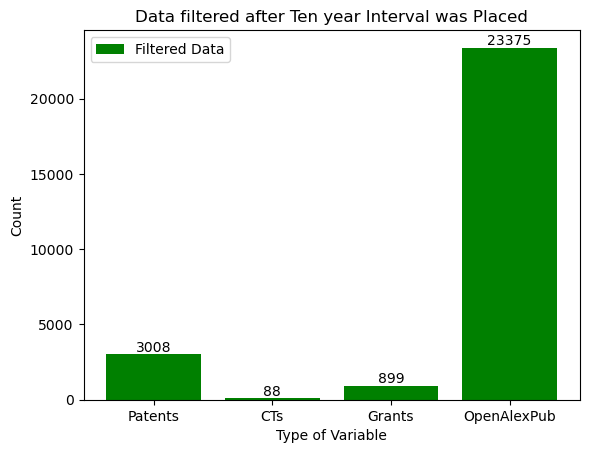

In [70]:
bars_filtered = plt.bar(x, total_raw, color='g', label='Filtered Data')
for bar, count in zip(bars_filtered, total_raw):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{count}', ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel("Type of Variable")
plt.ylabel("Count")
plt.legend()
plt.title("Data filtered after Ten year Interval was Placed")

plt.show()

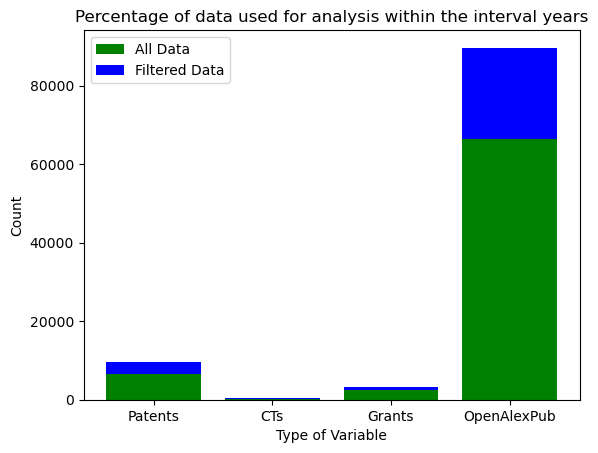

In [71]:
bars_all = plt.bar(x, total_percentages, color='g', label='All Data')
bars_filtered = plt.bar(x, total_raw, bottom=total_percentages, color='b', label='Filtered Data')

plt.xlabel("Type of Variable")
plt.ylabel("Count")
plt.legend()
plt.title("Percentage of data used for analysis within the interval years")

plt.show()